In [1]:
import math
import random

class Cowan:
    def __init__(self, Ne, Ni, ws, w0, h, alpha, beta):
        self.Ne = Ne
        self.Ni = Ni
        self.h = h
        self.w0 = w0
        self.ws = ws
        self.alpha = alpha
        self.beta = beta
        self.wee = (ws + w0) / 2
        self.wei = (ws + w0) / 2
        self.wie = (ws - w0) / 2
        self.wii = (ws - w0) / 2
        self.k = int(Ne * self.fsigma())
        self.l = int(Ni * self.fsigma())

    def fsigma(self):
        s1 = 0
        s2 = 1
        while abs(s2 - s1) > 1e-12:
            sm = (s1 + s2) / 2
            s = self.w0 * sm + self.h
            rate = (0 if s <= 0 else self.beta * math.tanh(s))
            ftmp = (1 - sm) * rate - self.alpha * sm
            if ftmp < 0:
                s2 = sm
            else:
                s1 = sm
        return (s1 + s2) / 2

    def dinamica(self, step):
        nhit = 0
        t = 0
        while t < step:
            x = self.k / self.Ne
            y = self.l / self.Ni
            se = self.wee * x - self.wei * y + self.h
            si = self.wie * x - self.wii * y + self.h
            fe = max(0, self.beta * math.tanh(se))  # activation rate excitatory neurons
            fi = max(0, self.beta * math.tanh(si))  # activation rate inhibitory neurons
            rae = (self.Ne - self.k) * fe  # total activation rate excitatory
            rai = (self.Ni - self.l) * fi  # total activation rate inhibitory
            rse = self.k * self.alpha  # total deactivation rate excitatory
            rsi = self.l * self.alpha  # total deactivation rate inhibitory
            rtot = rae + rai + rse + rsi
            dt = -math.log((1.0 + random.random()) / (2.0 + random.random())) / rtot
            if t + dt > step:
                break
            t += dt
            xtmp = rtot * (1.0 + random.random()) / (2.0 + random.random())
            if xtmp < rae:
                self.k += 1
                nhit += 1
            elif xtmp < rae + rai:
                self.l += 1
                nhit += 1
            elif xtmp < rae + rai + rse:
                self.k -= 1
            else:
                self.l -= 1
        return nhit

if __name__ == "__main__":
    w0 = 0.1# 1,0.2,0.1
    h = 1e-6
    N = 1000
    delta = 0.16
    ws = 13.8
    alpha = 0.1
    beta = 1
    xin = 0.5
    Ne = N
    Ni = int(round(xin * N / (1 - xin)))
    X = Cowan(Ne, Ni, ws, w0, h, alpha, beta)


    stmp = 0
    n = 0
    stmp_arr = []
    n_arr = []
    count = 0
    cmin = 10000
    cmax = 1000000
    while True:
        nhit = X.dinamica(delta)
        if nhit == 0:
            if n > 0:
                count += 1
                if count > cmin:
                    # print(f"{n:12} {stmp:12}")
                    stmp_arr.append(stmp)
                    n_arr.append(n)
                if count >= cmax:
                    break
                stmp = 0
                n = 0
        else:
            stmp += nhit
            n += 1

KeyboardInterrupt: 

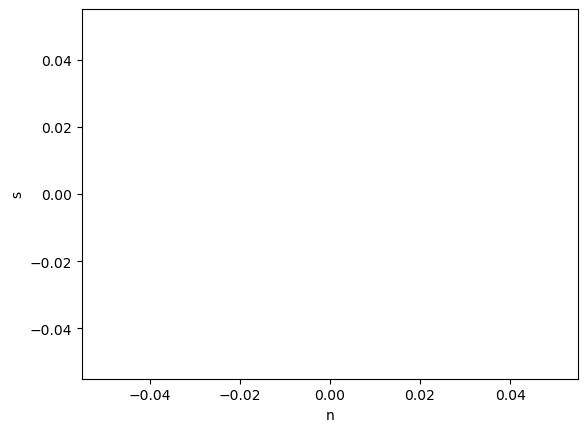

In [2]:
import matplotlib.pyplot as plt
plt.plot(n_arr, stmp_arr, '.')
plt.xlabel('n')
plt.ylabel('s')
plt.show()